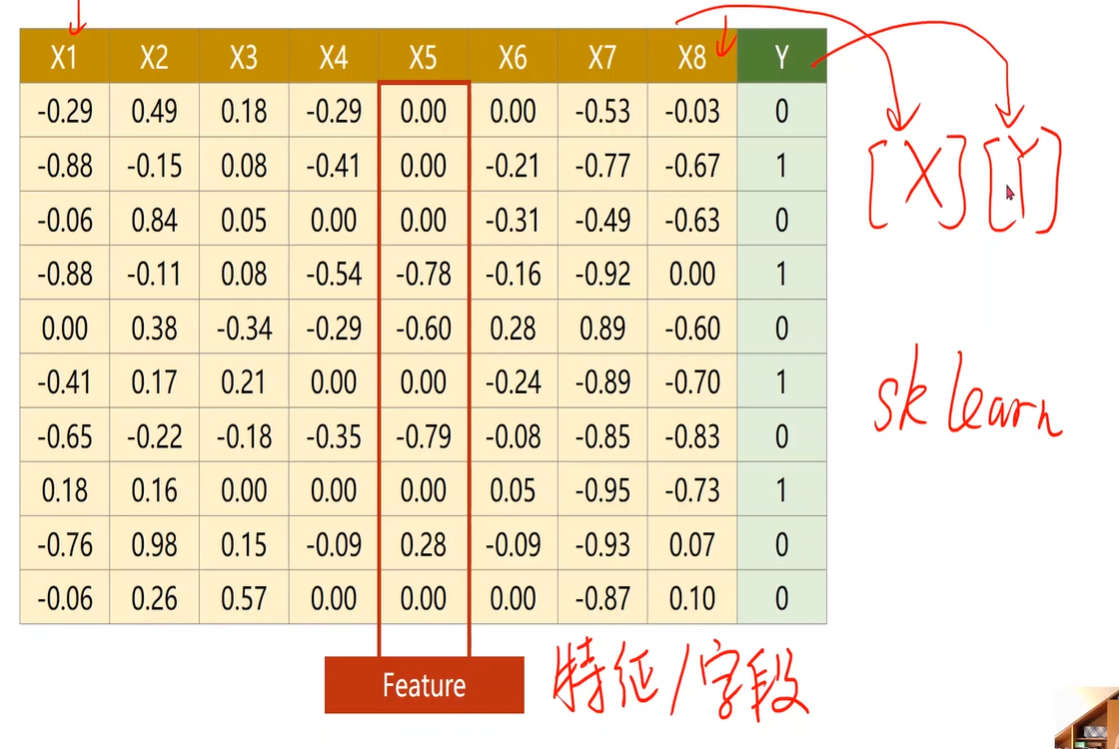

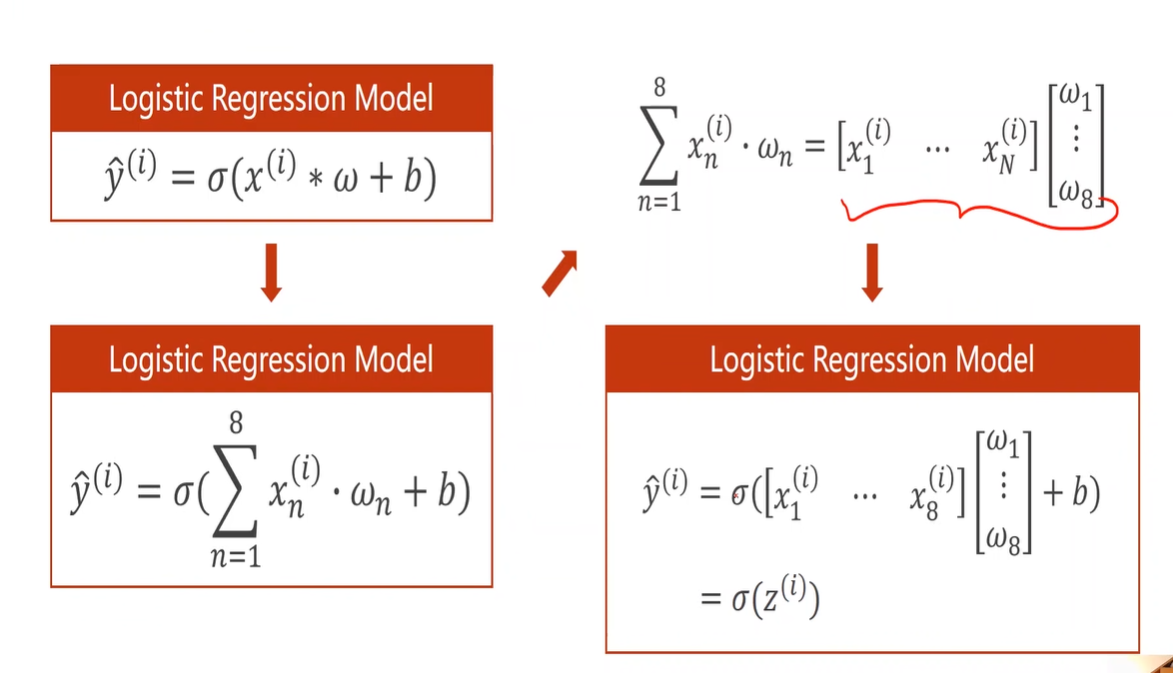

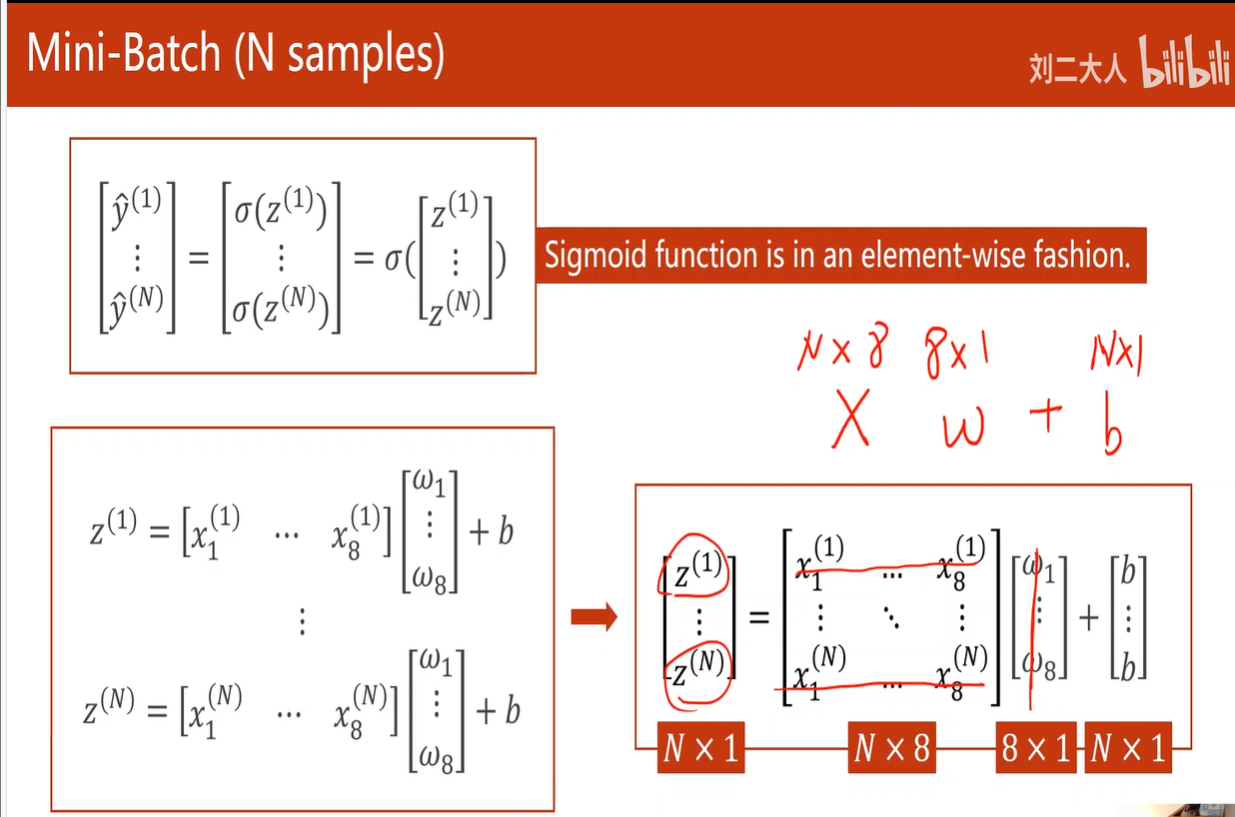

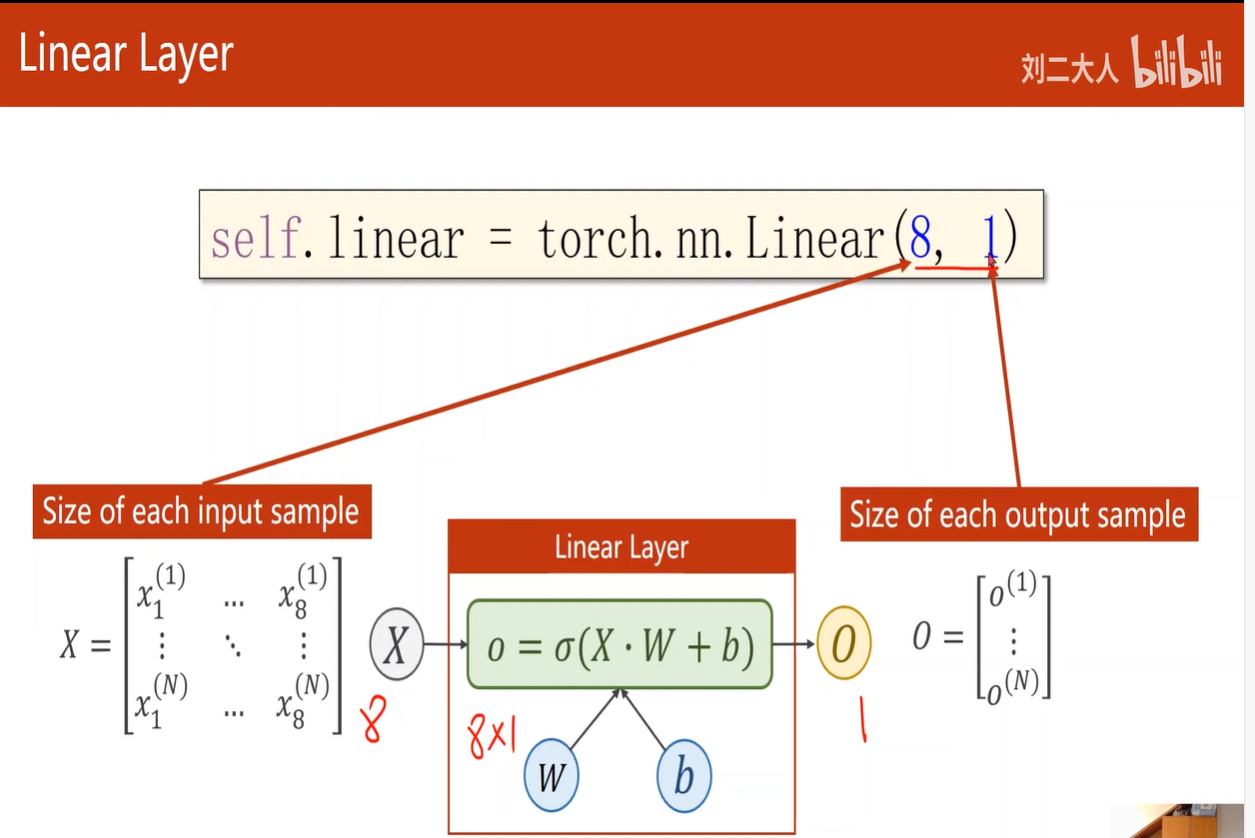

矩阵：空间变换的函数

8->2->1

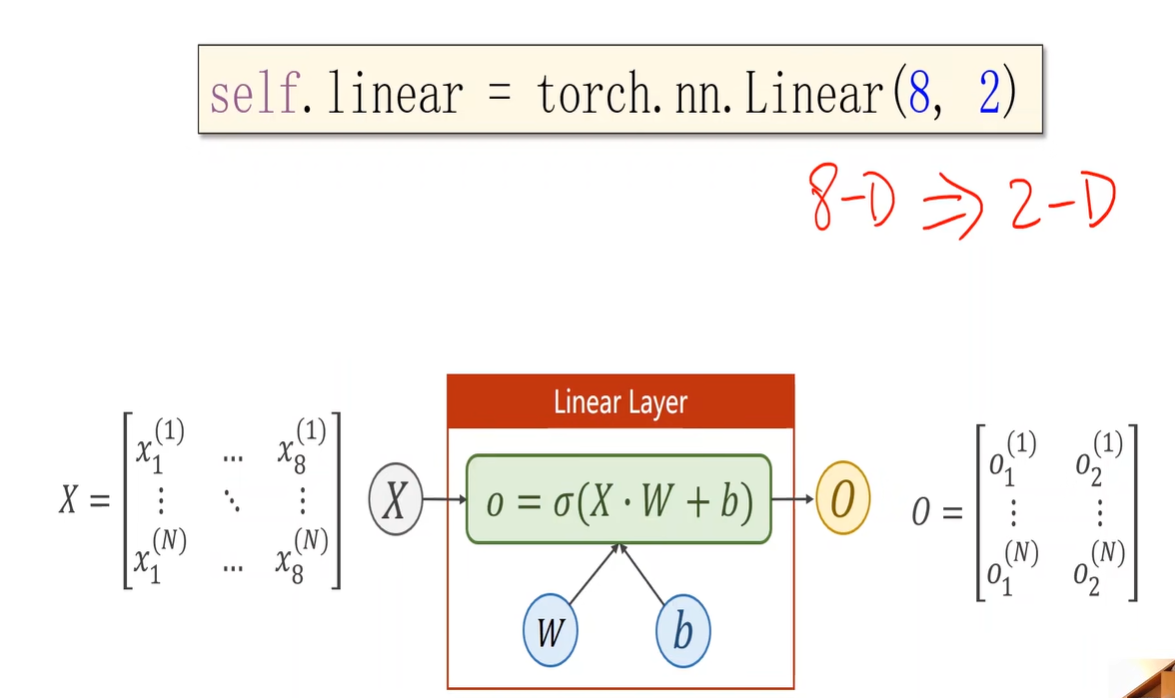

8->6->2->1

每一次空间压缩都要进行非线性变换，增加非线性因子，拟合非线性变换

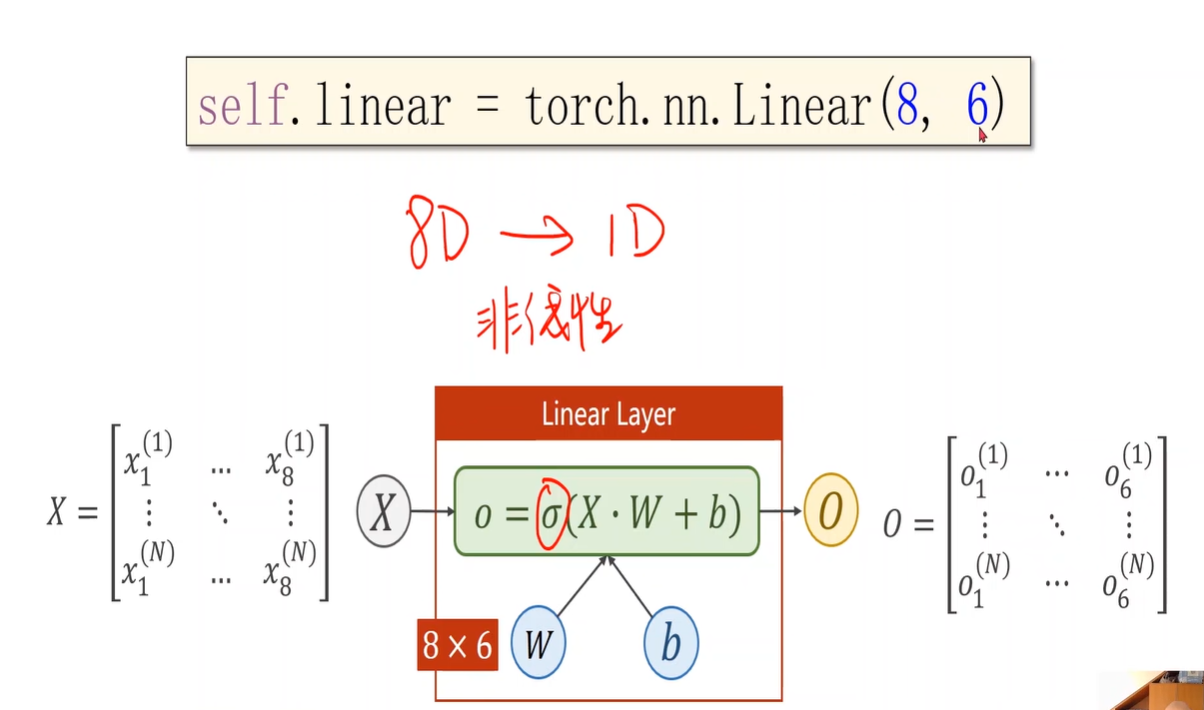





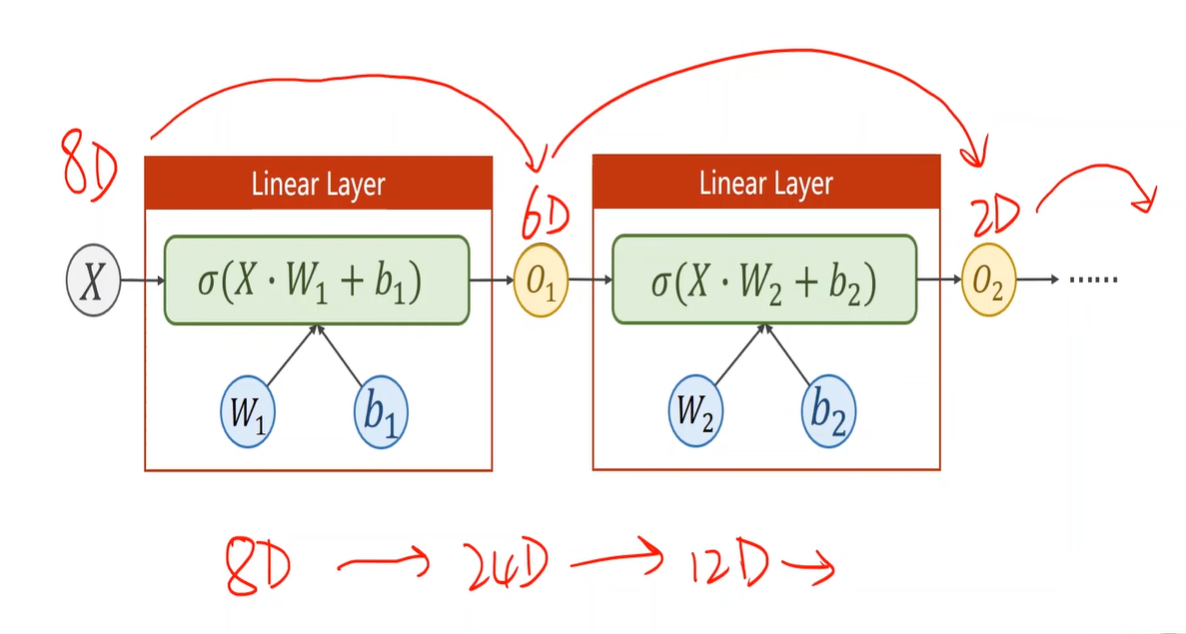

学习能力太强不好，容易学到噪声，要有泛化能力

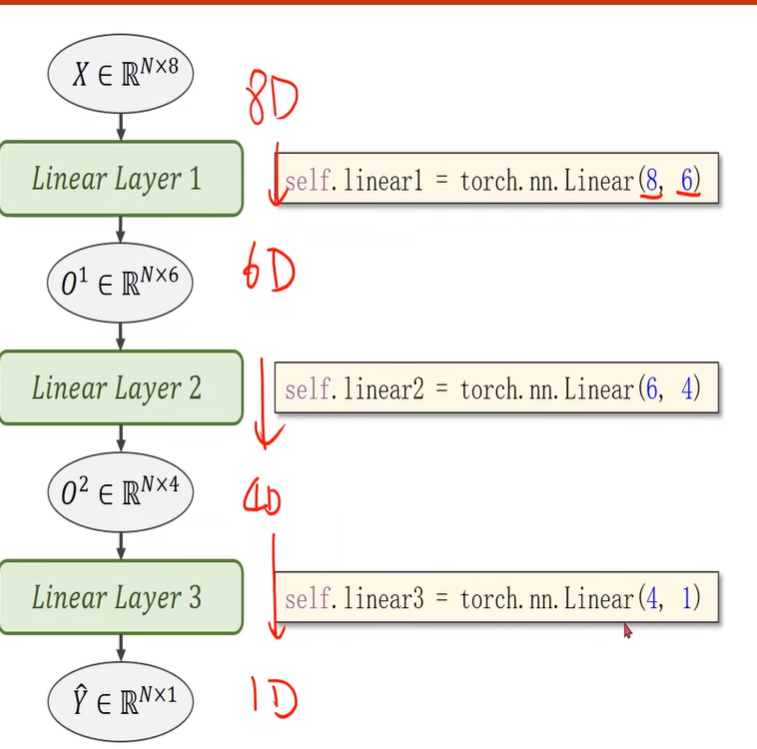

In [6]:
import pandas as pd
import torch

In [2]:
xy=pd.read_csv('E:\深度学习\刘二\数据集\diabetes.csv')
xy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x=xy.iloc[:,:-1]
y=xy.iloc[:,[-1]]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [7]:
x=torch.tensor(x.values,dtype=torch.float32)
y=torch.tensor(y.values,dtype=torch.float32)

In [8]:
x

tensor([[  6.0000, 148.0000,  72.0000,  ...,  33.6000,   0.6270,  50.0000],
        [  1.0000,  85.0000,  66.0000,  ...,  26.6000,   0.3510,  31.0000],
        [  8.0000, 183.0000,  64.0000,  ...,  23.3000,   0.6720,  32.0000],
        ...,
        [  5.0000, 121.0000,  72.0000,  ...,  26.2000,   0.2450,  30.0000],
        [  1.0000, 126.0000,  60.0000,  ...,  30.1000,   0.3490,  47.0000],
        [  1.0000,  93.0000,  70.0000,  ...,  30.4000,   0.3150,  23.0000]])

In [9]:
y

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

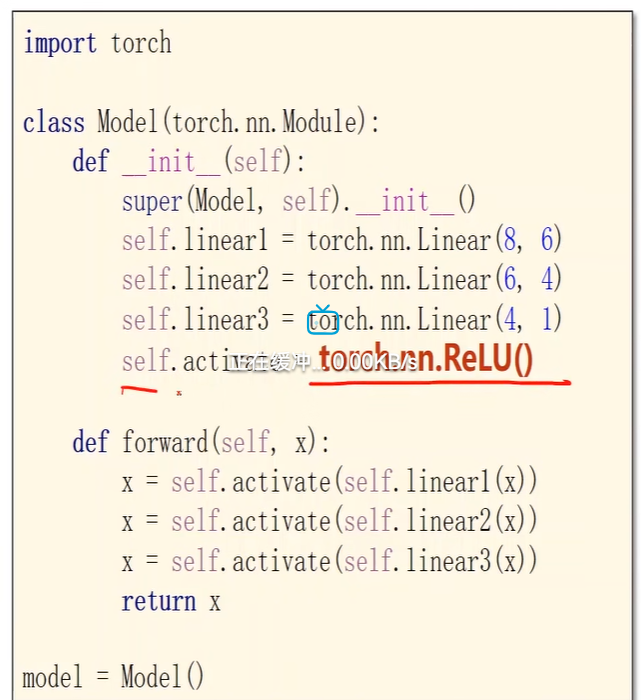

In [25]:
import torch

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.activate = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = self.activate(self.linear3(x))
        return x

model = Model()

relu最后一个地方小于0就输出0，可以把最后一个地方换为sigmoid

In [26]:
criterion = torch.nn.BCELoss(size_average=True)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [27]:
for epoch in range(800):
    # Forward
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(epoch, loss.item())

    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Update
    optimizer.step()

0 0.7108566164970398
1 0.7102828621864319
2 0.7097144722938538
3 0.7091513276100159
4 0.7085934281349182
5 0.708040714263916
6 0.7074930667877197
7 0.7069504261016846
8 0.7064127922058105
9 0.7058801651000977
10 0.7053524851799011
11 0.7048296332359314
12 0.7043115496635437
13 0.7037982940673828
14 0.7032897472381592
15 0.7027859091758728
16 0.7022867202758789
17 0.7017920613288879
18 0.7013019919395447
19 0.7008164525032043
20 0.7003352642059326
21 0.6998586058616638
22 0.6993862986564636
23 0.6989182829856873
24 0.6984546780586243
25 0.6979951858520508
26 0.6975399851799011
27 0.697088897228241
28 0.6966419219970703
29 0.6961991786956787
30 0.6957604289054871
31 0.6953256130218506
32 0.6948947906494141
33 0.6944678425788879
34 0.6940448880195618
35 0.6936258673667908
36 0.6932104229927063
37 0.6927990317344666
38 0.6923913359642029
39 0.6919872760772705
40 0.6915869116783142
41 0.691190242767334
42 0.6907971501350403
43 0.6904076933860779
44 0.6900216937065125
45 0.6896392703056335
4

In [28]:
model.eval()
with torch.no_grad():
    # 增加维度，变为 [1, 8]，适配模型输入要求
    x1 = torch.tensor([6,148,72,35,0,33.6,0.627,50], dtype=torch.float32).unsqueeze(0)  
    y1 = model(x1)
    print(y1.data)

tensor([[0.3486]])
